## Seismic bumps
### Introducción

El dataset elegido se corresponde con un conjunto de datos relacionados con el sector minero, concretamente fueron obtenidos en una mina de carbón de Polonia. El dataser describe, por cada muestra, una situación en la que se ha dado un evento sísmico, describiendo factores que determinan la fuerza del mismo. 

En estos casos, la estadística es inefectiva para la predicción de eventos, por lo que se requiere del uso de técnicas más avanzadas.

A partir de estos datos, se busca determinar, a partir de técnicas de aprendizaje, predecir futuras situaciones, para discernir si son situaciones de peligro o no peligro.

Veamos cómo se muestran los datos, y qué relaciones existen entre las variables:

In [1]:
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.regressor import AlphaSelection
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from scipy import stats
# sns.set()
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import set_config
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

In [2]:
# Carga de datos
seismic = pd.read_csv("./seismic-bumps.csv", header=0, delimiter = ',')
# Eliminar variables que no son de utilidad para el problema
seismic = seismic.drop(columns=['id'])

In [3]:
# Descripción de los datos y análisis:

# Visualizacion basica
seismic.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Mirar medias, desviacion estandar, etc.
seismic.describe().T

,count,mean,std,min,25%,50%,75%,max
genergy,2584.0,90242.523,229200.509,100.0,11660.0,25485.0,52832.50,2.596e+06
gpuls,2584.0,538.579,562.653,2.0,190.0,379.0,669.00,4.518e+03
gdenergy,2584.0,12.376,80.319,-96.0,-37.0,-6.0,38.00,1.245e+03
gdpuls,2584.0,4.509,63.167,-96.0,-36.0,-6.0,30.25,8.380e+02
nbumps,2584.0,0.860,1.365,0.0,0.0,0.0,1.00,9.000e+00
nbumps2,2584.0,0.394,0.784,0.0,0.0,0.0,1.00,8.000e+00
nbumps3,2584.0,0.393,0.770,0.0,0.0,0.0,1.00,7.000e+00
nbumps4,2584.0,0.068,0.279,0.0,0.0,0.0,0.00,3.000e+00
nbumps5,2584.0,0.005,0.068,0.0,0.0,0.0,0.00,1.000e+00
nbumps6,2584.0,0.000,0.000,0.0,0.0,0.0,0.00,0.000e+00


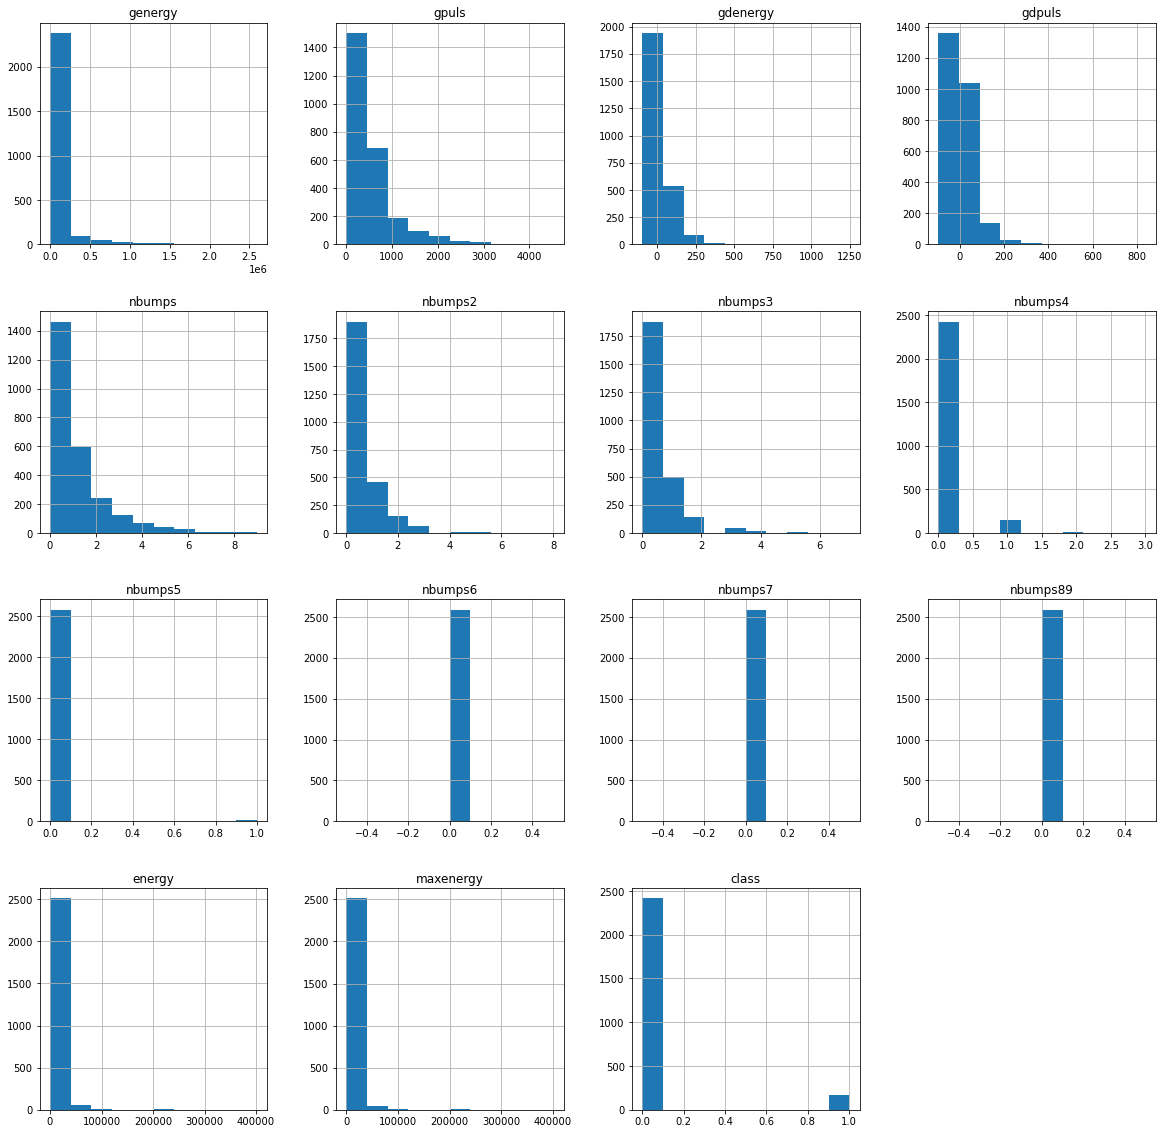

In [5]:
# Cómputo de la frecuencia de valores por variable, en forma de histograma
seismic.loc[:,:].hist(figsize=(20,20));

/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE canno

/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
/home/alpha/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


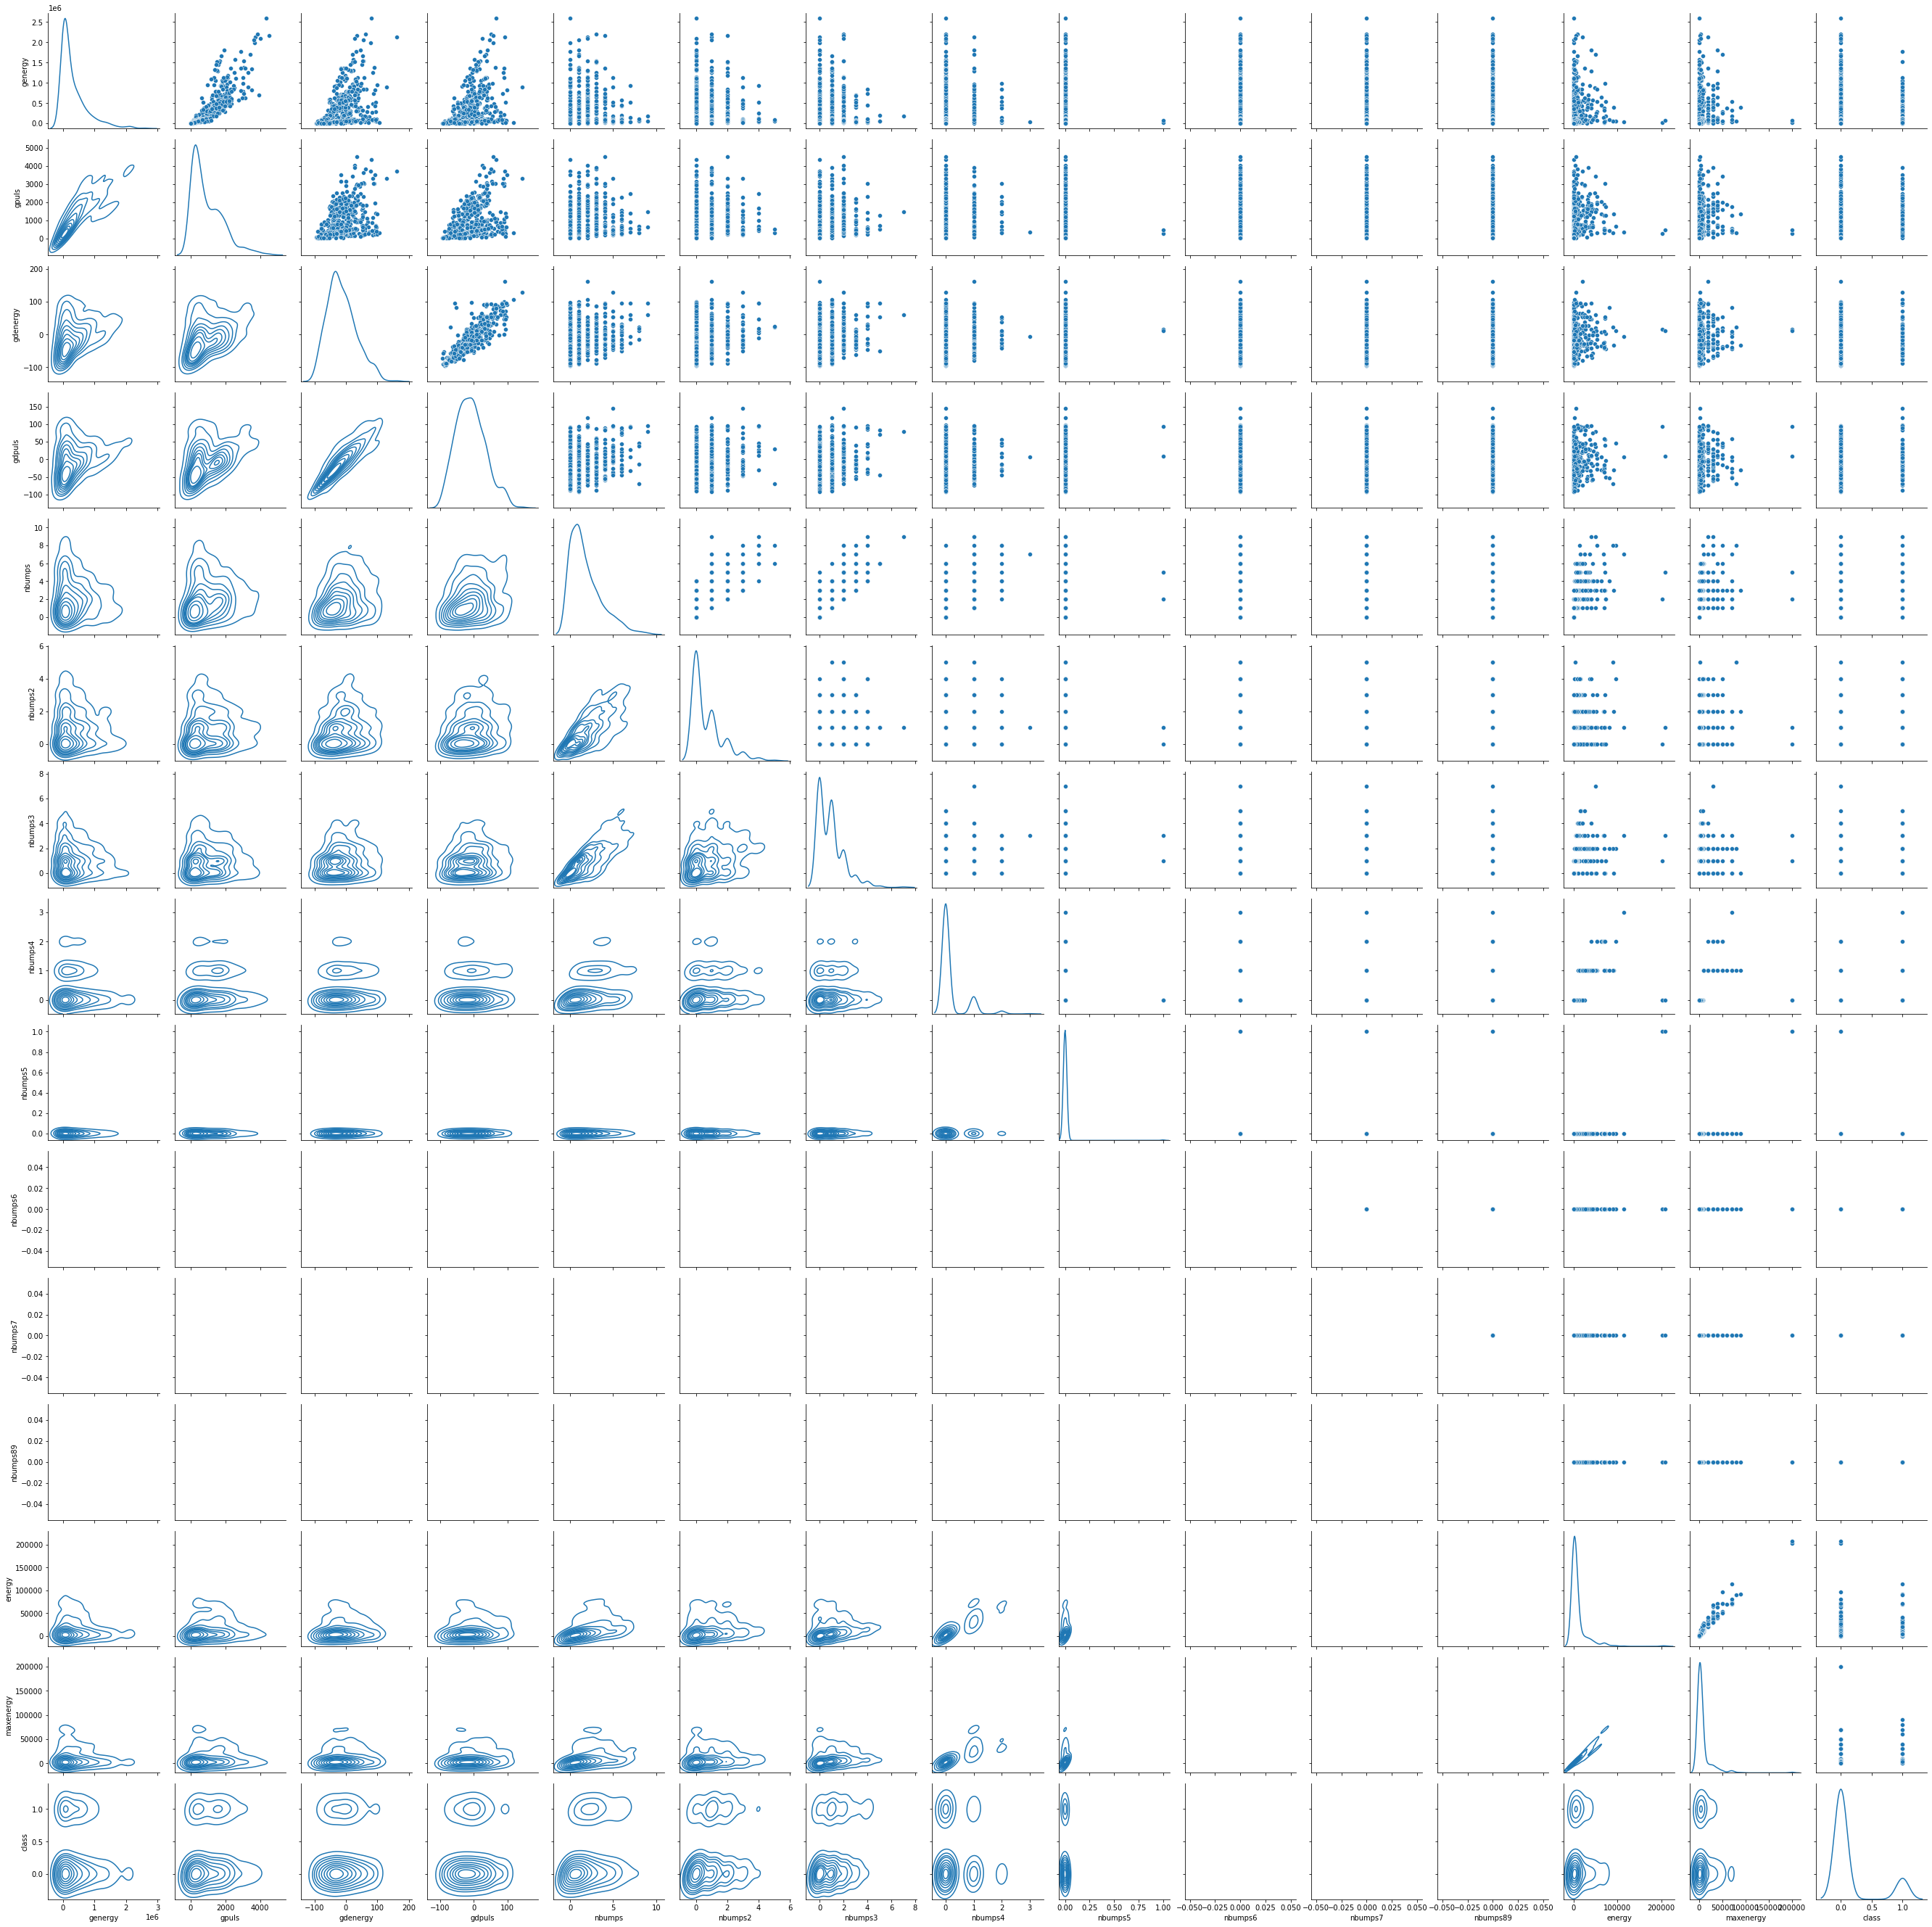

In [6]:
# Visualización de las relaciones de las variables con la variable objetivo
g = sns.PairGrid(seismic[:500], diag_sharey=False)    # Reducimos el número de muestras para facilitar el cómputo
g.map_upper(sns.scatterplot);
g.map_lower(sns.kdeplot);
g.map_diag(sns.kdeplot);

/tmp/ipykernel_154522/4183902198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = seismic.corr()


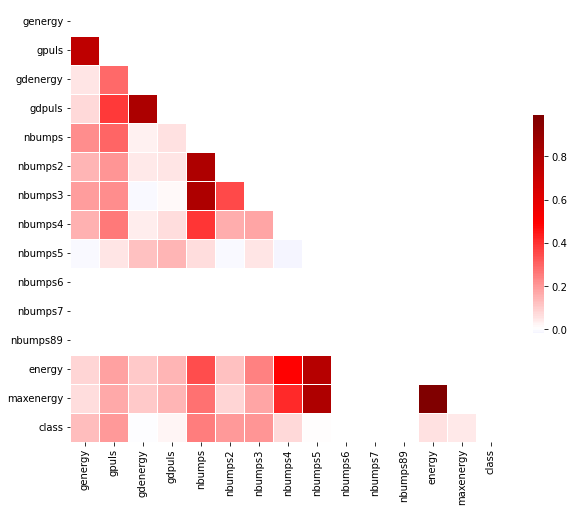

In [7]:
# Matriz de correlación entre la variable objetivo y el resto de variables
corr = seismic.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Descripción de los datos

El objetivo es predecir si la siguiente estimación tendrá valor class == 0 o class == 1 (no peligro / peligro).

Observamos que el dataset consta de 19 atributos y 2584 observaciones. Todos los atributos son numéricos menos seismic, seismoacustic y shift, que son categóricos. La variable objetivo es class, que es un atributo booleano que determina si existe peligro (==1) o no (==0).

Observamos que, a priori, ninguno de ellos consta de una distribución normal. Las variables categóricas (seismic, seismoacustic y shift) se corresponden con la peligrosidad de la actividad y el tipo de actividad (shift/coal-getting). Las variables numéricas se refieren a las mediciones registradas de energía, números de baches sísmicos registrados en rangos de energía, estadísticas de energía promedio y máximos de energía y, finalmente, resultado de peligrosidad / no peligrosidad.

Observamos también que los valores de los atributos no se reparten de forma homogenea, sino que se concentran en valores determinados, por eso encontramos picos tan altos en los histogramas. 

En cuanto a la correlación de las variables, encontramos que la variable objetivo "class" no tiene una correlación buena con ninguna de las demás variables. Los valores de correlación más cercanos se encuentran entre el 0.2 y 0.3. Por otra parte, sí que observamos buenas correlaciones entre otras variables, siendo la correlación más fuerte entre maxenergy y energy, con un 1 de correlación; rbumps3 con rbumps, con un valor aproximado entre 0.8 y 0.9; y rbumps2 y rbumps, con un valor aproximado de 0.8.

### Resolución mediante regresión/clasificación

A continuación, queremos ver si el problema se podría resolver mediante una regresión lineal o una clasificación.

Para ello, separamos el conjunto de training y de test en proporción 70%/30%, conjuntamente con un preproceso de los atributos categóricos a variables "dummy", que nos ayudarán a facilitar la regresión lineal.

In [8]:
#X = seismic[['seismic','seismoacoustic','shift','genergy','gpuls','gdenergy','gdpuls','ghazard','nbumps','nbumps2','nbumps3','nbumps4','nbumps5','nbumps6','nbumps7','nbumps89','energy','maxenergy']]
X = seismic.drop(columns=['class'])
Y = seismic[['class']]

X = pd.get_dummies(data=X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Instanciamos el modelo LinearRegression 
lr = LinearRegression();

# Ajustamos con los datos de entrenamiento con el método fit
lr.fit(X_train,y_train);

# Predecimos con el método predict 
y_pred = lr.predict(X_train);

In [9]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  class   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     12.91
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           7.56e-35
Time:                        23:16:26   Log-Likelihood:                -7.2840
No. Observations:                1808   AIC:                             50.57
Df Residuals:                    1790   BIC:                             149.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0212      0.012     -1.843      0.065      -0.044       0.001
genergy          -8.896e-08   4.23e-08     -2.102      0.036   -1.72e-07   -5.97e-09
gpuls                0.0001   2.08e-05      5.601      0.000    7.58e-05       0.000
gdenergy         -7.509e-05      0.000     -0.610      0.542      -0.000       0.000
gdpuls              -0.0002      0.000     -1.275      0.202      -0.001       0.000
nbumps               0.9982      0.244      4.084      0.000       0.519       1.478
nbumps2             -0.9585      0.245     -3.919      0.000      -1.438      -0.479
nbumps3             -0.9536      0.245     -3.899      0.000      -1.433      -0.474
nbumps4             -0.9568      0.249     -3.849      0.000      -1.444      -0.469
nbumps5             -0.5759      0.325     -1.775      0.076      -1.212       0.061
nbumps6          -7.147e-16   1.89e-16     -3.774      0.000   -1.09e-15   -3.43e-16
nbumps7          -5.077e-15   1.52e-15     -3.341      0.001   -8.06e-15    -2.1e-15
nbumps89          9.443e-17   3.28e-17      2.876      0.004       3e-17    1.59e-16
energy            1.044e-06   3.84e-06      0.272      0.786   -6.49e-06    8.58e-06
maxenergy        -2.799e-06   3.71e-06     -0.755      0.450   -1.01e-05    4.47e-06
seismic_b            0.0150      0.013      1.115      0.265      -0.011       0.041
seismoacoustic_b     0.0052      0.013      0.411      0.681      -0.020       0.030
seismoacoustic_c     0.0248      0.058      0.428      0.668      -0.089       0.139
shift_W              0.0042      0.014      0.294      0.769      -0.024       0.032
ghazard_b           -0.0118      0.023     -0.512      0.609      -0.057       0.033
ghazard_c           -0.0987      0.074     -1.334      0.182      -0.244       0.046
==============================================================================
Omnibus:                     1073.479   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7223.820
Skew:                           2.863   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                     9.52e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Conclusiones

Observamos que la predicción con LinearRegression no es buena para este dataset concreto (R² muy bajo) y por ello necesitaremos de otros métodos de predicción.

### Referencias

Utilizamos citación en formato APA para esta práctica:

- UCI Machine Learning Repository: seismic-bumps Data Set. (s. f.). Recuperado 24 de octubre de 2022, de http://archive.ics.uci.edu/ml/datasets/seismic-bumps